In [17]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.preprocessing import MinMaxScaler
import datetime 
import yfinance as yf
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

In [18]:
# List of tickers
tickers = ['AAPL', 'NVDA', 'MSFT', 'INTC', 'TSLA', 'CSCO']

### Fetching Historical Data from yahoo finance API for the tickers

In [19]:
# Date range for historical data
start_date = "2019-01-01"
end_date = "2024-04-30"

# Create an empty list to store dataframes
dataframes = []

# Loop through each ticker, fetch the data, and add the company name
for ticker in tickers:
    ticker_data = yf.Ticker(ticker).history(start=start_date, end=end_date)
    ticker_data['Company'] = ticker
    dataframes.append(ticker_data)

# Combine all dataframes into a single dataframe
df_portfolio = pd.concat(dataframes)

In [20]:
df_portfolio

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
Date,,,,,,,,
2019-01-02 00:00:00-05:00,37.068631,38.016349,36.910678,37.793777,148158800,0.0,0.0,AAPL
2019-01-03 00:00:00-05:00,34.457629,34.874051,33.983772,34.029243,365248800,0.0,0.0,AAPL
2019-01-04 00:00:00-05:00,34.589258,35.551335,34.414554,35.481930,234428400,0.0,0.0,AAPL
2019-01-07 00:00:00-05:00,35.587237,35.618350,34.917134,35.402958,219111200,0.0,0.0,AAPL
2019-01-08 00:00:00-05:00,35.793049,36.333919,35.544155,36.077843,164101200,0.0,0.0,AAPL
...,...,...,...,...,...,...,...,...
2024-04-23 00:00:00-04:00,48.139999,48.459999,48.060001,48.320000,16261700,0.0,0.0,CSCO
2024-04-24 00:00:00-04:00,48.049999,48.380001,47.919998,48.349998,14828500,0.0,0.0,CSCO
2024-04-25 00:00:00-04:00,48.779999,48.930000,47.849998,48.099998,18790900,0.0,0.0,CSCO


### Visualize the stock portfolio performance of holding for last 5 years

Text(0, 0.5, 'Closing Price (USD)')

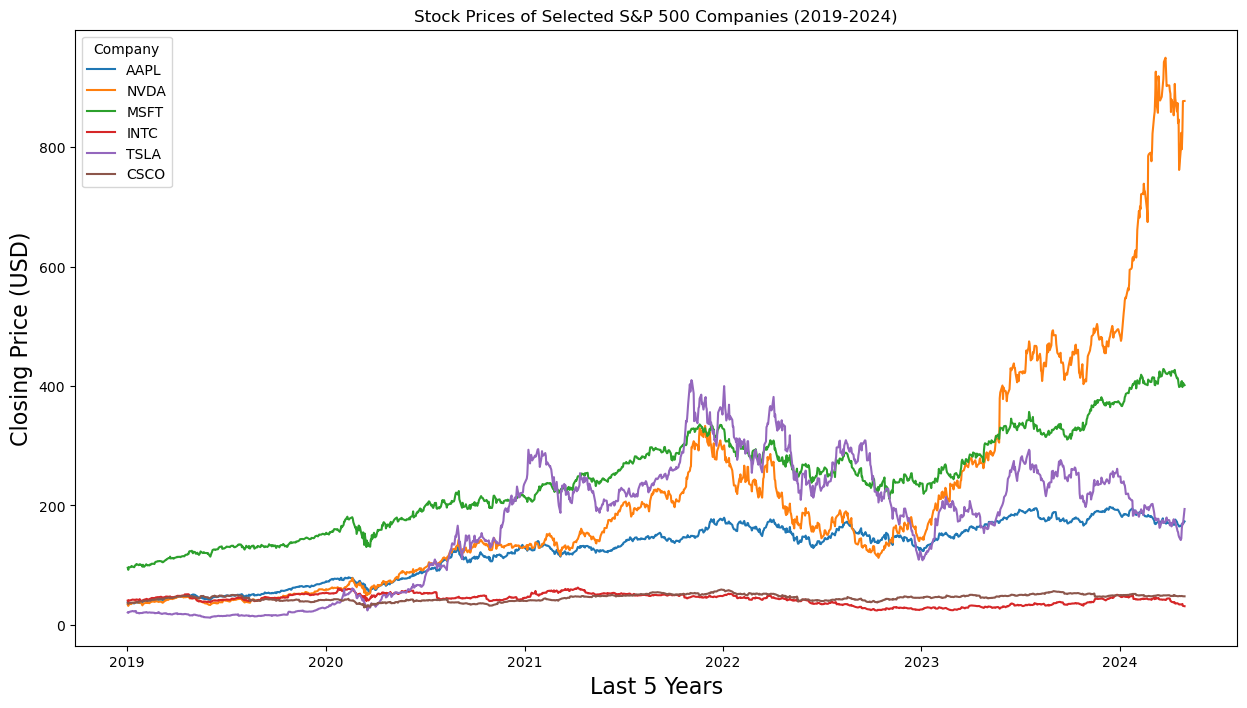

In [21]:
# Visualize the stock portfolio performance of holding
fig, visual_plot = plt.subplots(figsize=(15,8))
visual_plot = sns.lineplot(data =df_portfolio, x = df_portfolio.index, y= df_portfolio["Close"], hue = df_portfolio["Company"])
visual_plot.set_title("Stock Prices of Selected S&P 500 Companies (2019-2024)")
visual_plot.set_xlabel('Last 5 Years', fontsize=16)
visual_plot.set_ylabel('Closing Price (USD)' , fontsize=16)

### Create separate dataframe for each tickers

In [22]:
# Create a dictionary to store DataFrames for each stock ticker
ticker_dataframes = {}

# Loop through tickers and create a DataFrame for each ticker
for i, ticker in enumerate(tickers):
    ticker_dataframes[f'df_{i+1}'] = df_portfolio[df_portfolio['Company'] == ticker].copy()

# Display the first few rows of each ticker's DataFrame
for df_name, df in ticker_dataframes.items():
    print(f"Data for {df_name}:\n", df.head(), "\n")

Data for df_1:
                                 Open       High        Low      Close  \
Date                                                                    
2019-01-02 00:00:00-05:00  37.068631  38.016349  36.910678  37.793777   
2019-01-03 00:00:00-05:00  34.457629  34.874051  33.983772  34.029243   
2019-01-04 00:00:00-05:00  34.589258  35.551335  34.414554  35.481930   
2019-01-07 00:00:00-05:00  35.587237  35.618350  34.917134  35.402958   
2019-01-08 00:00:00-05:00  35.793049  36.333919  35.544155  36.077843   

                              Volume  Dividends  Stock Splits Company  
Date                                                                   
2019-01-02 00:00:00-05:00  148158800        0.0           0.0    AAPL  
2019-01-03 00:00:00-05:00  365248800        0.0           0.0    AAPL  
2019-01-04 00:00:00-05:00  234428400        0.0           0.0    AAPL  
2019-01-07 00:00:00-05:00  219111200        0.0           0.0    AAPL  
2019-01-08 00:00:00-05:00  164101200    

In [23]:
ticker_dataframes['df_1']

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
Date,,,,,,,,
2019-01-02 00:00:00-05:00,37.068631,38.016349,36.910678,37.793777,148158800,0.0,0.0,AAPL
2019-01-03 00:00:00-05:00,34.457629,34.874051,33.983772,34.029243,365248800,0.0,0.0,AAPL
2019-01-04 00:00:00-05:00,34.589258,35.551335,34.414554,35.481930,234428400,0.0,0.0,AAPL
2019-01-07 00:00:00-05:00,35.587237,35.618350,34.917134,35.402958,219111200,0.0,0.0,AAPL
2019-01-08 00:00:00-05:00,35.793049,36.333919,35.544155,36.077843,164101200,0.0,0.0,AAPL
...,...,...,...,...,...,...,...,...
2024-04-23 00:00:00-04:00,165.126031,166.823726,164.696606,166.673920,49537800,0.0,0.0,AAPL
2024-04-24 00:00:00-04:00,166.314410,169.070681,165.984870,168.791061,48251800,0.0,0.0,AAPL
2024-04-25 00:00:00-04:00,169.300369,170.378908,167.922233,169.659882,50558300,0.0,0.0,AAPL


### Defining functions to use only Close price of the stocks

In [24]:
# Define the function to retain only 'Close' prices
def close_prices_only(data):
    return data[['Close']]

# Create a dictionary to store DataFrames for close prices of each stock ticker
close_prices_dataframes = {}

# Loop through tickers and create a DataFrame for close prices for each ticker
for i, ticker in enumerate(tickers):
    close_prices_dataframes[f'df_close_{i+1}'] = close_prices_only(ticker_dataframes[f'df_{i+1}'])

# Display the first few rows of each close prices DataFrame
for df_name, df in close_prices_dataframes.items():
    print(f"Data for {df_name}:\n", df.head(), "\n")

Data for df_close_1:
                                Close
Date                                
2019-01-02 00:00:00-05:00  37.793777
2019-01-03 00:00:00-05:00  34.029243
2019-01-04 00:00:00-05:00  35.481930
2019-01-07 00:00:00-05:00  35.402958
2019-01-08 00:00:00-05:00  36.077843 

Data for df_close_2:
                                Close
Date                                
2019-01-02 00:00:00-05:00  33.788891
2019-01-03 00:00:00-05:00  31.747471
2019-01-04 00:00:00-05:00  33.781448
2019-01-07 00:00:00-05:00  35.569859
2019-01-08 00:00:00-05:00  34.684341 

Data for df_close_3:
                                Close
Date                                
2019-01-02 00:00:00-05:00  95.673454
2019-01-03 00:00:00-05:00  92.153816
2019-01-04 00:00:00-05:00  96.439819
2019-01-07 00:00:00-05:00  96.562828
2019-01-08 00:00:00-05:00  97.262955 

Data for df_close_4:
                                Close
Date                                
2019-01-02 00:00:00-05:00  40.775078
2019-01-03 00:00:0

In [25]:
## Function for scaling the data for LSTM

def min_max_scale(data):
    # Initialize MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    
    # Fit and transform the data using the scaler
    scaled_data = scaler.fit_transform(data.values)
    
    return scaler, scaled_data

In [26]:
# Scaling close prices for each stock ticker
df_scaler_1, df_scaled_1 = min_max_scale(close_prices_dataframes['df_close_1'])
df_scaler_2, df_scaled_2 = min_max_scale(close_prices_dataframes['df_close_2'])
df_scaler_3, df_scaled_3 = min_max_scale(close_prices_dataframes['df_close_3'])
df_scaler_4, df_scaled_4 = min_max_scale(close_prices_dataframes['df_close_4'])
df_scaler_5, df_scaled_5 = min_max_scale(close_prices_dataframes['df_close_5'])
df_scaler_6, df_scaled_6 = min_max_scale(close_prices_dataframes['df_close_6'])

In [27]:
def split_and_reshape_data(dataframe, pred_days):
    # Define the number of days to predict
    prediction_days = pred_days
    
    # Calculate the sizes of the training and testing sets
    train_size = int(np.ceil(len(dataframe) * 0.95))
    test_size = len(dataframe) - train_size
    
    # Split the data into training and testing sets
    train_data = dataframe[0: int(train_size), :]
    test_data = dataframe[train_size - prediction_days:, :]
    
    # Initialize lists to store features and target values for training and testing
    X_train, y_train, X_test, y_test = [], [], [], []
    
    # Generate sequences of features and target values for training set
    for i in range(prediction_days, len(train_data)):
        X_train.append(train_data[i - prediction_days: i, 0])
        y_train.append(train_data[i, 0])
        
    # Generate sequences of features and target values for testing set
    for i in range(prediction_days, len(test_data)):
        X_test.append(test_data[i - prediction_days: i, 0])
        y_test.append(test_data[i, 0])
        
    # Convert lists to numpy arrays
    X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)
    
    # Reshape the feature sets for LSTM input
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    # Return the prepared data
    return X_train, y_train, X_test, y_test

In [28]:
# Split and reshape data for each stock ticker
X1_train, y1_train, X1_test, y1_test = split_and_reshape_data(df_scaled_1, 30)
X2_train, y2_train, X2_test, y2_test = split_and_reshape_data(df_scaled_2, 30)
X3_train, y3_train, X3_test, y3_test = split_and_reshape_data(df_scaled_3, 30)
X4_train, y4_train, X4_test, y4_test = split_and_reshape_data(df_scaled_4, 30)
X5_train, y5_train, X5_test, y5_test = split_and_reshape_data(df_scaled_5, 30)
X6_train, y6_train, X6_test, y6_test = split_and_reshape_data(df_scaled_6, 30)

In [29]:
def lstm_model(X_train, y_train, epochs=100, batch_size=32):
    """
    Function to build and train an LSTM model for stock price prediction.
    
    Parameters:
    - X_train: numpy array, training features
    - y_train: numpy array, training labels
    - epochs: int, number of epochs for training (default: 100)
    - batch_size: int, batch size for training (default: 32)
    
    Returns:
    - model: trained Keras model
    """
    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    return model

In [30]:
# Build the LSTM model
model_lstm_1 = lstm_model(X1_train, y1_train)
model_lstm_2 = lstm_model(X2_train, y2_train)
model_lstm_3 = lstm_model(X3_train, y3_train)
model_lstm_4 = lstm_model(X4_train, y4_train)
model_lstm_5 = lstm_model(X5_train, y5_train)
model_lstm_6 = lstm_model(X6_train, y6_train)

2024-05-18 13:49:28.464227: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 13:49:28.464968: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 13:49:28.465385: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-18 13:49:29.381150: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 13:49:29.381669: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 13:49:29.382090: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-18 13:50:34.980163: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 13:50:34.980679: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 13:50:34.981163: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-18 13:51:43.059915: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 13:51:43.060442: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 13:51:43.061192: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-18 13:51:44.072557: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 13:51:44.073101: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 13:51:44.073548: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-18 13:52:52.734899: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 13:52:52.735493: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 13:52:52.735981: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-18 13:54:03.046987: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 13:54:03.048104: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 13:54:03.048580: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-18 13:54:03.957655: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 13:54:03.958236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 13:54:03.958826: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-18 13:55:15.674510: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 13:55:15.675120: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 13:55:15.675634: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-18 13:55:16.505128: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 13:55:16.505583: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_1_grad/concat/split_1/split_dim' with dtype int32
	 [[{{node gradients/split_1_grad/concat/split_1/split_dim}}]]


In [31]:
model_lstm_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 30, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 30, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [32]:
def predictions_inverse_scaler(scaler, model, X_test, y_test):
    """
    Function to inverse scale predicted and true values back to original scale.
    
    Parameters:
    - scaler: sklearn MinMaxScaler object, used for scaling the data
    - model: trained Keras model
    - X_test: numpy array, test features
    - y_test: numpy array, true test labels
    
    Returns:
    - y_pred: numpy array, inverse scaled predicted values
    - y_test: numpy array, inverse scaled true values
    """
    # Predictions using the model
    y_pred = model.predict(X_test)
    
    # Inverse scaling of predicted values
    y_pred = scaler.inverse_transform(y_pred)
    
    # Inverse scaling of true values
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    return y_pred, y_test

In [33]:
# Make predictions and inverse scale for each stock ticker
y1_pred, y1_test_inv = predictions_inverse_scaler(df_scaler_1, model_lstm_1, X1_test, y1_test)
y2_pred, y2_test_inv = predictions_inverse_scaler(df_scaler_2, model_lstm_2, X2_test, y2_test)
y3_pred, y3_test_inv = predictions_inverse_scaler(df_scaler_3, model_lstm_3, X3_test, y3_test)
y4_pred, y4_test_inv = predictions_inverse_scaler(df_scaler_4, model_lstm_4, X4_test, y4_test)
y5_pred, y5_test_inv = predictions_inverse_scaler(df_scaler_5, model_lstm_5, X5_test, y5_test)
y6_pred, y6_test_inv = predictions_inverse_scaler(df_scaler_6, model_lstm_6, X6_test, y6_test)

2024-05-18 13:56:26.032538: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 13:56:26.033115: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 13:56:26.033640: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 0s 5ms/step


2024-05-18 13:56:26.247762: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 13:56:26.248286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 13:56:26.248741: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 0s 5ms/step


2024-05-18 13:56:26.900919: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 13:56:26.901452: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 13:56:26.901903: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 0s 5ms/step


2024-05-18 13:56:27.320871: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 13:56:27.321411: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 13:56:27.321848: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 0s 5ms/step


2024-05-18 13:56:27.734588: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 13:56:27.735174: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 13:56:27.735787: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 0s 5ms/step


2024-05-18 13:56:28.145489: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 13:56:28.146051: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 13:56:28.146478: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 0s 5ms/step


In [34]:
def plot_predictions(y_pred, y_true, ticker_label):
    """
    Function to plot predicted values against true values with ticker label.
    
    Parameters:
    - y_pred: numpy array, predicted values
    - y_true: numpy array, true values
    - ticker_label: str, label for the ticker
    """
    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label='True Values')
    plt.plot(y_pred, label='Predicted Values')
    plt.title(f'True vs Predicted Values for {ticker_label}')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

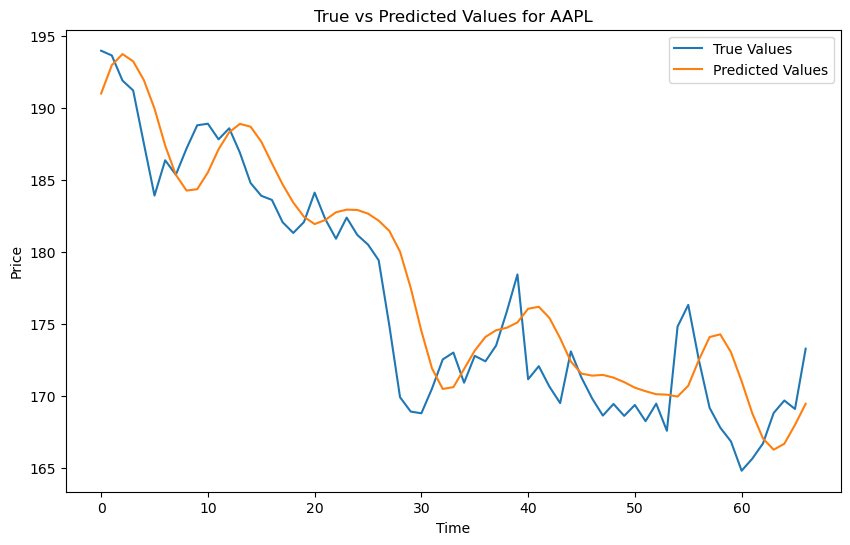

In [35]:
plot_predictions(y1_pred, y1_test_inv, tickers[0])

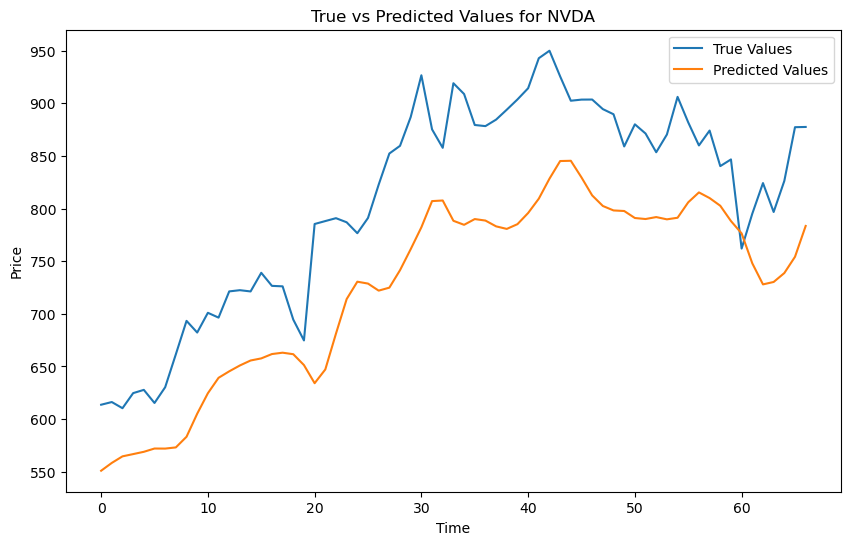

In [36]:
plot_predictions(y2_pred, y2_test_inv, tickers[1])

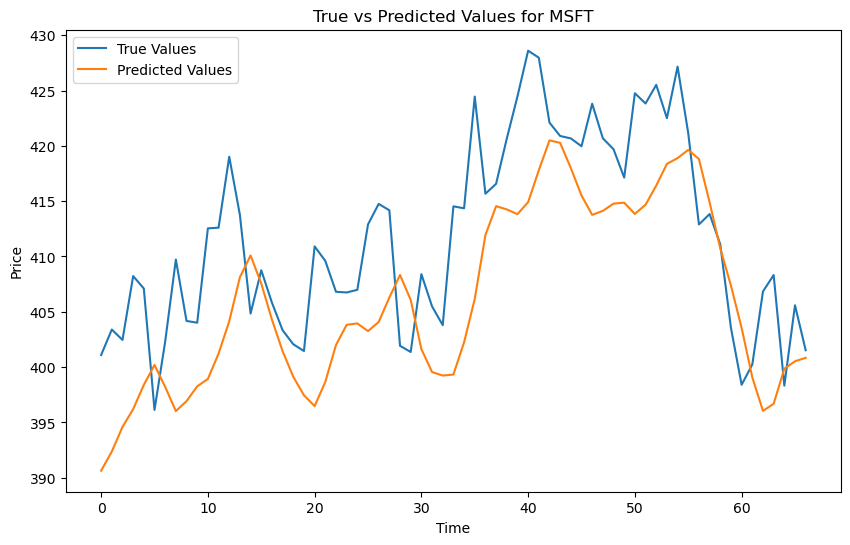

In [37]:
plot_predictions(y3_pred, y3_test_inv, tickers[2])

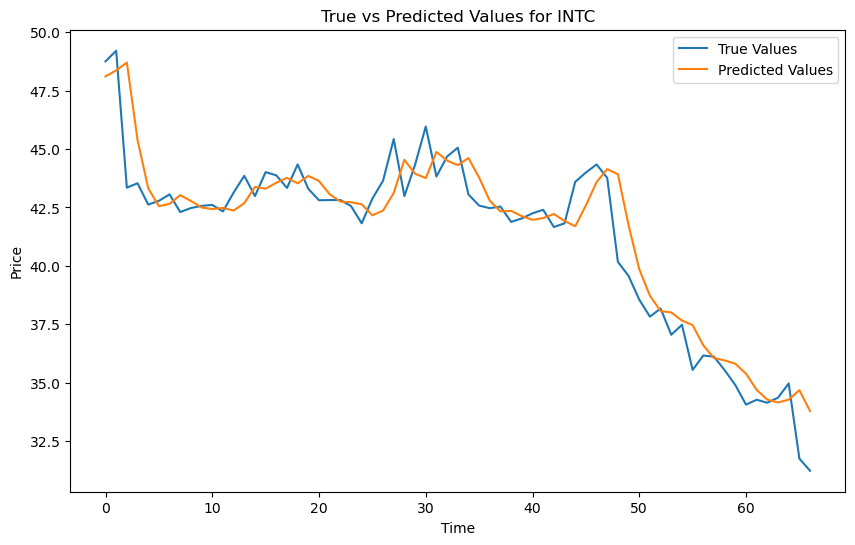

In [38]:
plot_predictions(y4_pred, y4_test_inv, tickers[3])

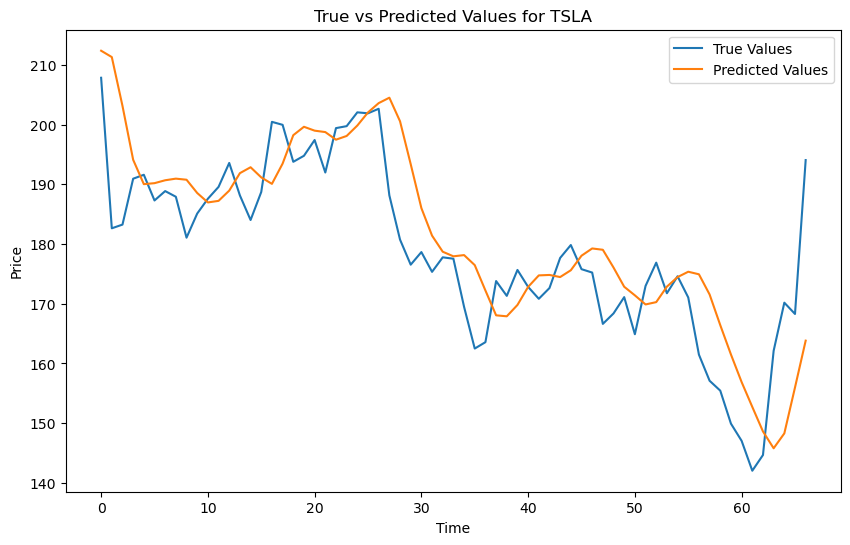

In [39]:
plot_predictions(y5_pred, y5_test_inv, tickers[4])

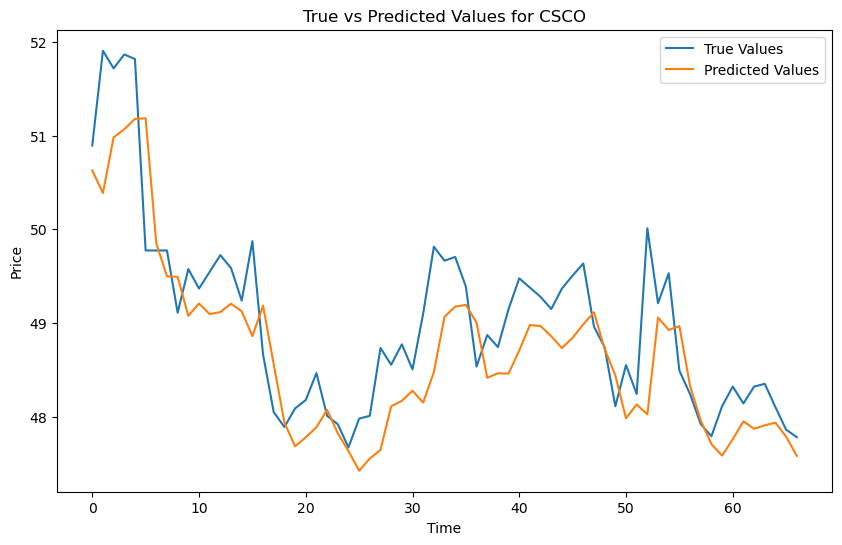

In [40]:
plot_predictions(y6_pred, y6_test_inv, tickers[5])

In [41]:
history_lstm_1 = model_lstm_1.fit(X1_train, y1_train, epochs = 100, batch_size = 32, validation_data = (X1_test, y1_test))
history_lstm_2 = model_lstm_2.fit(X2_train, y2_train, epochs = 100, batch_size = 32, validation_data = (X2_test, y2_test))
history_lstm_3 = model_lstm_3.fit(X3_train, y3_train, epochs = 100, batch_size = 32, validation_data = (X3_test, y3_test))
history_lstm_4 = model_lstm_4.fit(X4_train, y4_train, epochs = 100, batch_size = 32, validation_data = (X4_test, y4_test))
history_lstm_5 = model_lstm_5.fit(X5_train, y5_train, epochs = 100, batch_size = 32, validation_data = (X5_test, y5_test))
history_lstm_6 = model_lstm_6.fit(X6_train, y6_train, epochs = 100, batch_size = 32, validation_data = (X6_test, y6_test))

Epoch 1/100
37/39 [===========================>..] - ETA: 0s - loss: 0.0014

2024-05-18 13:56:29.851898: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 13:56:29.852435: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 13:56:29.852907: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

39/39 [==============================] - 1s 35ms/step - loss: 0.0015 - val_loss: 4.0327e-04
Epoch 2/100
 1/39 [..............................] - ETA: 0s - loss: 0.0015

2024-05-18 13:56:30.063354: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 13:56:30.063946: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 13:56:30.064483: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

39/39 [==============================] - 1s 18ms/step - loss: 0.0015 - val_loss: 4.0250e-04
Epoch 3/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 7.5305e-04
Epoch 4/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 3.8897e-04
Epoch 5/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 3.7462e-04
Epoch 6/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0013 - val_loss: 7.5194e-04
Epoch 7/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0013 - val_loss: 4.0060e-04
Epoch 8/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 3.8973e-04
Epoch 9/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0016 - val_loss: 4.7683e-04
Epoch 10/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 6.3254e-04
Epoch 11/100
39/39 [==============================] - 1s 18ms/step - loss: 

39/39 [==============================] - 1s 18ms/step - loss: 0.0012 - val_loss: 5.8707e-04
Epoch 81/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0010 - val_loss: 2.0969e-04
Epoch 82/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0011 - val_loss: 2.0701e-04
Epoch 83/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0011 - val_loss: 2.9263e-04
Epoch 84/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0010 - val_loss: 2.2965e-04
Epoch 85/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0010 - val_loss: 4.8754e-04
Epoch 86/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0010 - val_loss: 2.3361e-04
Epoch 87/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0011 - val_loss: 2.3332e-04
Epoch 88/100
39/39 [==============================] - 1s 18ms/step - loss: 9.3933e-04 - val_loss: 1.9875e-04
Epoch 89/100
39/39 [==============================] - 1s 18ms/st

2024-05-18 13:57:39.855652: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 13:57:39.856289: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 13:57:39.856826: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

39/39 [==============================] - 1s 31ms/step - loss: 3.4257e-04 - val_loss: 0.0038
Epoch 2/100


2024-05-18 13:57:40.114975: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 13:57:40.115610: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 13:57:40.116030: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

39/39 [==============================] - 1s 18ms/step - loss: 3.0232e-04 - val_loss: 0.0016
Epoch 3/100
39/39 [==============================] - 1s 18ms/step - loss: 3.0850e-04 - val_loss: 0.0012
Epoch 4/100
39/39 [==============================] - 1s 18ms/step - loss: 3.4970e-04 - val_loss: 0.0034
Epoch 5/100
39/39 [==============================] - 1s 18ms/step - loss: 3.2631e-04 - val_loss: 0.0100
Epoch 6/100
39/39 [==============================] - 1s 18ms/step - loss: 3.4313e-04 - val_loss: 0.0087
Epoch 7/100
39/39 [==============================] - 1s 18ms/step - loss: 3.1124e-04 - val_loss: 0.0027
Epoch 8/100
39/39 [==============================] - 1s 18ms/step - loss: 2.9620e-04 - val_loss: 0.0029
Epoch 9/100
39/39 [==============================] - 1s 18ms/step - loss: 3.2740e-04 - val_loss: 0.0035
Epoch 10/100
39/39 [==============================] - 1s 18ms/step - loss: 3.4717e-04 - val_loss: 0.0011
Epoch 11/100
39/39 [==============================] - 1s 18ms/step - loss: 

39/39 [==============================] - 1s 20ms/step - loss: 2.7204e-04 - val_loss: 0.0100
Epoch 81/100
39/39 [==============================] - 1s 19ms/step - loss: 2.6591e-04 - val_loss: 0.0043
Epoch 82/100
39/39 [==============================] - 1s 19ms/step - loss: 2.9833e-04 - val_loss: 0.0081
Epoch 83/100
39/39 [==============================] - 1s 19ms/step - loss: 2.7703e-04 - val_loss: 0.0040
Epoch 84/100
39/39 [==============================] - 1s 19ms/step - loss: 3.2647e-04 - val_loss: 0.0048
Epoch 85/100
39/39 [==============================] - 1s 18ms/step - loss: 3.2675e-04 - val_loss: 0.0066
Epoch 86/100
39/39 [==============================] - 1s 18ms/step - loss: 2.5582e-04 - val_loss: 0.0101
Epoch 87/100
39/39 [==============================] - 1s 18ms/step - loss: 2.2228e-04 - val_loss: 0.0118
Epoch 88/100
39/39 [==============================] - 1s 18ms/step - loss: 2.5115e-04 - val_loss: 0.0093
Epoch 89/100
39/39 [==============================] - 1s 18ms/step -

2024-05-18 13:59:04.351981: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 13:59:04.352596: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 13:59:04.353260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

39/39 [==============================] - 1s 29ms/step - loss: 8.7054e-04 - val_loss: 7.6325e-04
Epoch 2/100
 1/39 [..............................] - ETA: 0s - loss: 5.0765e-04

2024-05-18 13:59:04.559840: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 13:59:04.560357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 13:59:04.560858: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

39/39 [==============================] - 1s 19ms/step - loss: 8.2413e-04 - val_loss: 3.8829e-04
Epoch 3/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0011 - val_loss: 2.9332e-04
Epoch 4/100
39/39 [==============================] - 1s 18ms/step - loss: 9.2135e-04 - val_loss: 0.0015
Epoch 5/100
39/39 [==============================] - 1s 18ms/step - loss: 8.4094e-04 - val_loss: 6.0535e-04
Epoch 6/100
39/39 [==============================] - 1s 19ms/step - loss: 7.5464e-04 - val_loss: 3.1650e-04
Epoch 7/100
39/39 [==============================] - 1s 19ms/step - loss: 8.3011e-04 - val_loss: 2.7609e-04
Epoch 8/100
39/39 [==============================] - 1s 18ms/step - loss: 9.3639e-04 - val_loss: 6.4291e-04
Epoch 9/100
39/39 [==============================] - 1s 18ms/step - loss: 7.9651e-04 - val_loss: 0.0013
Epoch 10/100
39/39 [==============================] - 1s 18ms/step - loss: 9.4572e-04 - val_loss: 5.3729e-04
Epoch 11/100
39/39 [==============================]

Epoch 78/100
39/39 [==============================] - 1s 18ms/step - loss: 7.5175e-04 - val_loss: 2.5919e-04
Epoch 79/100
39/39 [==============================] - 1s 18ms/step - loss: 6.7766e-04 - val_loss: 0.0014
Epoch 80/100
39/39 [==============================] - 1s 18ms/step - loss: 6.3656e-04 - val_loss: 4.5114e-04
Epoch 81/100
39/39 [==============================] - 1s 18ms/step - loss: 6.0339e-04 - val_loss: 2.7739e-04
Epoch 82/100
39/39 [==============================] - 1s 18ms/step - loss: 6.0309e-04 - val_loss: 4.3058e-04
Epoch 83/100
39/39 [==============================] - 1s 18ms/step - loss: 7.2952e-04 - val_loss: 0.0010
Epoch 84/100
39/39 [==============================] - 1s 18ms/step - loss: 6.7351e-04 - val_loss: 3.1913e-04
Epoch 85/100
39/39 [==============================] - 1s 18ms/step - loss: 6.9239e-04 - val_loss: 5.0322e-04
Epoch 86/100
39/39 [==============================] - 1s 18ms/step - loss: 7.7646e-04 - val_loss: 0.0022
Epoch 87/100
39/39 [===========

2024-05-18 14:00:15.349203: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 14:00:15.349729: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 14:00:15.350366: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

39/39 [==============================] - 1s 29ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 2/100
 1/39 [..............................] - ETA: 0s - loss: 0.0025

2024-05-18 14:00:15.556309: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 14:00:15.556919: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 14:00:15.557356: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

39/39 [==============================] - 1s 18ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 3/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 4/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 5/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 6/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 7/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 8/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 9/100
39/39 [==============================] - 1s 20ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 10/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 11/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 12/1

39/39 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 84/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 85/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 86/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 87/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 88/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 89/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 90/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 91/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 92/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 0.0012
Epo

2024-05-18 14:01:25.270868: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 14:01:25.271405: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 14:01:25.272056: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

39/39 [==============================] - 1s 29ms/step - loss: 0.0014 - val_loss: 5.3077e-04
Epoch 2/100
 1/39 [..............................] - ETA: 0s - loss: 0.0013

2024-05-18 14:01:25.478422: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 14:01:25.478984: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 14:01:25.479410: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

39/39 [==============================] - 1s 18ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 3/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 6.5051e-04
Epoch 4/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0012 - val_loss: 6.0192e-04
Epoch 5/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0013 - val_loss: 4.9964e-04
Epoch 6/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0012 - val_loss: 5.0981e-04
Epoch 7/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0013 - val_loss: 6.5080e-04
Epoch 8/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0013 - val_loss: 5.6613e-04
Epoch 9/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0013 - val_loss: 4.6920e-04
Epoch 10/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0012 - val_loss: 5.7754e-04
Epoch 11/100
39/39 [==============================] - 1s 18ms/step - loss: 0.00

39/39 [==============================] - 1s 19ms/step - loss: 0.0011 - val_loss: 5.1198e-04
Epoch 81/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0011 - val_loss: 4.7142e-04
Epoch 82/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0010 - val_loss: 6.2227e-04
Epoch 83/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0012 - val_loss: 3.5880e-04
Epoch 84/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0012 - val_loss: 4.0135e-04
Epoch 85/100
39/39 [==============================] - 1s 20ms/step - loss: 0.0011 - val_loss: 3.8626e-04
Epoch 86/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0012 - val_loss: 3.9412e-04
Epoch 87/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0012 - val_loss: 4.2792e-04
Epoch 88/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0012 - val_loss: 4.9814e-04
Epoch 89/100
39/39 [==============================] - 1s 20ms/step -

2024-05-18 14:02:39.835570: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 14:02:39.836298: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 14:02:39.836802: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

39/39 [==============================] - 1s 32ms/step - loss: 0.0014 - val_loss: 3.2613e-04
Epoch 2/100
 1/39 [..............................] - ETA: 0s - loss: 8.9947e-04

2024-05-18 14:02:40.083681: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-18 14:02:40.084209: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-18 14:02:40.084712: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

39/39 [==============================] - 1s 19ms/step - loss: 0.0016 - val_loss: 3.4519e-04
Epoch 3/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0015 - val_loss: 2.9099e-04
Epoch 4/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0013 - val_loss: 2.8494e-04
Epoch 5/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0015 - val_loss: 2.8753e-04
Epoch 6/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0013 - val_loss: 2.7259e-04
Epoch 7/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0013 - val_loss: 3.0495e-04
Epoch 8/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0013 - val_loss: 3.8227e-04
Epoch 9/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0014 - val_loss: 2.9118e-04
Epoch 10/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0013 - val_loss: 4.3403e-04
Epoch 11/100
39/39 [==============================] - 1s 19ms/step - loss: 

39/39 [==============================] - 1s 19ms/step - loss: 0.0011 - val_loss: 4.3885e-04
Epoch 81/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0010 - val_loss: 3.0459e-04
Epoch 82/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0010 - val_loss: 3.1490e-04
Epoch 83/100
39/39 [==============================] - 1s 19ms/step - loss: 9.6224e-04 - val_loss: 3.8795e-04
Epoch 84/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0011 - val_loss: 3.0004e-04
Epoch 85/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0011 - val_loss: 7.3057e-04
Epoch 86/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0011 - val_loss: 8.0196e-04
Epoch 87/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0010 - val_loss: 2.9174e-04
Epoch 88/100
39/39 [==============================] - 1s 19ms/step - loss: 9.9225e-04 - val_loss: 3.8347e-04
Epoch 89/100
39/39 [==============================] - 1s 18m

In [42]:
def plot_training_error(history):
    """
    Function to plot training and validation error over epochs.
    
    Parameters:
    - history: Keras history object containing training history
    """
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Error')
    plt.legend()
    plt.show()

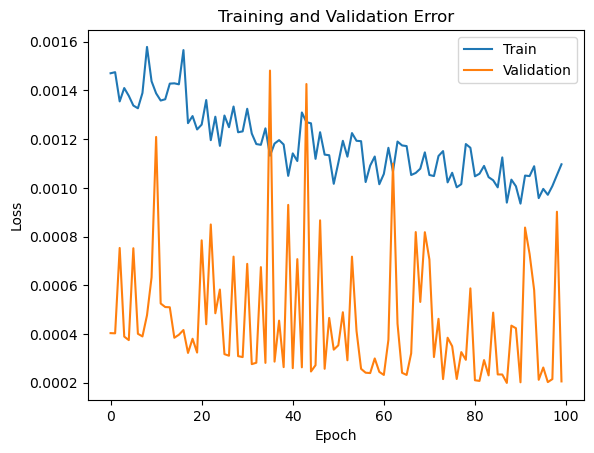

In [43]:
plot_training_error(history_lstm_1)

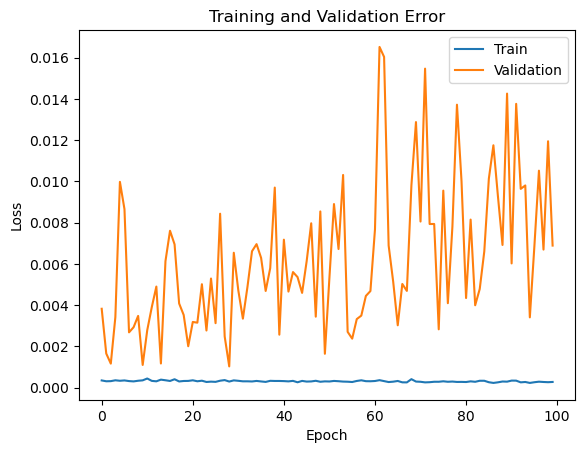

In [44]:
plot_training_error(history_lstm_2)

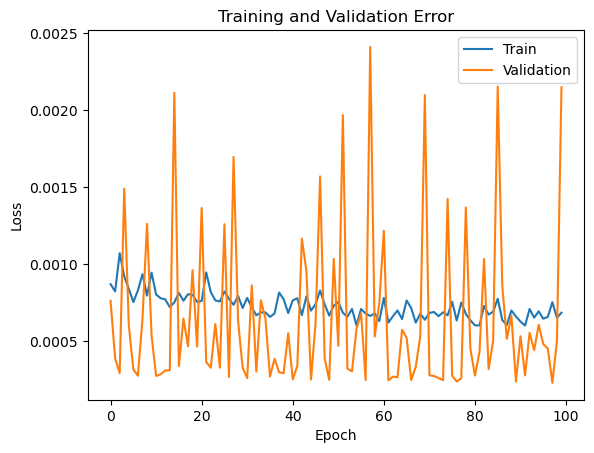

In [45]:
plot_training_error(history_lstm_3)

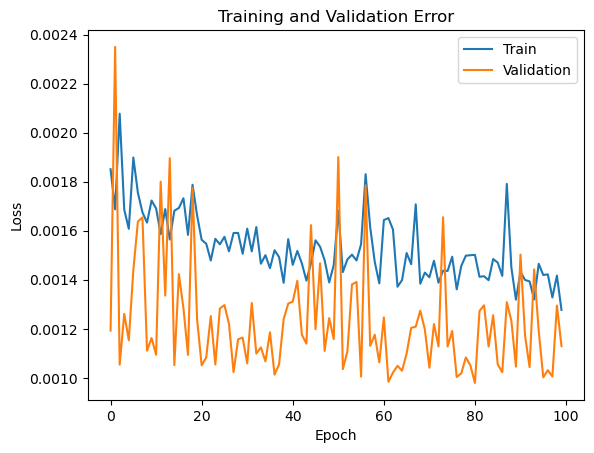

In [46]:
plot_training_error(history_lstm_4)

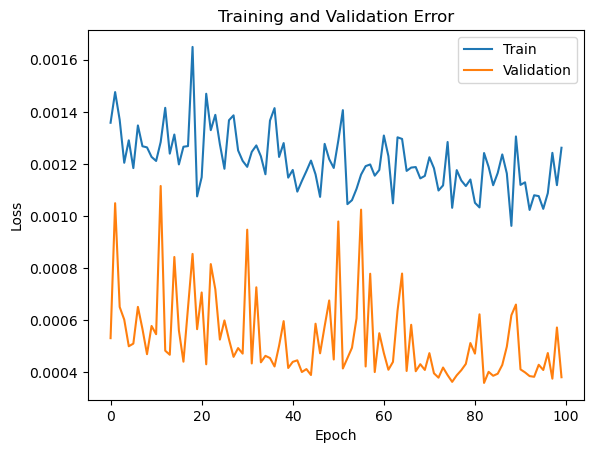

In [47]:
plot_training_error(history_lstm_5)

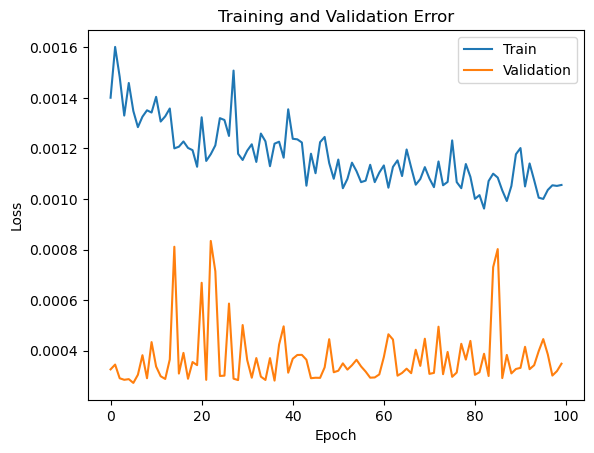

In [48]:
plot_training_error(history_lstm_6)

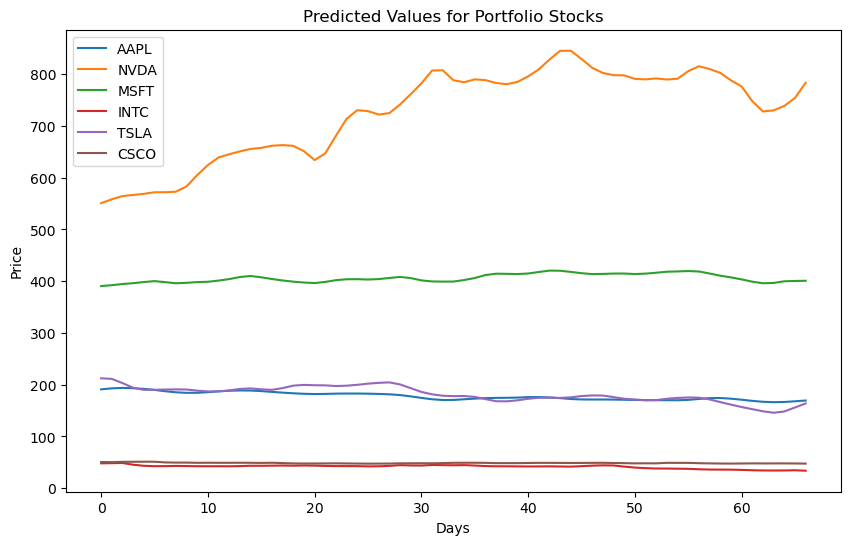

In [49]:
# Specify the tickers and their corresponding predicted values
tickers = ['AAPL', 'NVDA', 'MSFT', 'INTC', 'TSLA', 'CSCO']
y_pred_list = [y1_pred, y2_pred, y3_pred, y4_pred, y5_pred, y6_pred]

plt.figure(figsize=(10, 6))
for ticker_label, y_pred in zip(tickers, y_pred_list):
    plt.plot(y_pred, label=ticker_label)

plt.title('Predicted Values for Portfolio Stocks')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()